## Part 1 - Warm-up

The first task consists of fitting the following equation to a set of 50 x/y data points.
y=a∗log(x)+b


Here is a plot of the data points with the desired model curve.
y = 3.390*log(x) + 31.529

Your curve should be optimal with respect to the residual sum of squares metric (RSS). Perform the following steps
- Fit the curve, plot it
- Compute the RSS and R2 measures
- Discuss the results, is it a good R2 score

In [3]:
import pandas as pd
import os

# Load data
data_df = pd.read_csv("p3_task-1.csv")
data_df.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


Let's plot the data to see how it looks

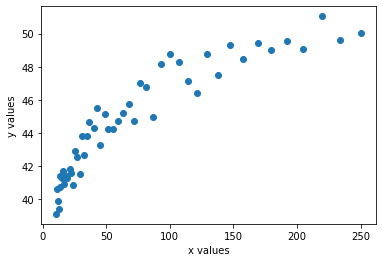

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

#define xy variables
x = data_df.x.values
y = data_df.y.values

# Plot points
plt.scatter(x, y)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

- Fit the curve, plot it

In [52]:
import numpy as np
import numpy.polynomial.polynomial as poly


def fit(x, y, deg, xlabel, ylabel, legend):
    # Fit a polynomial
    coefs = poly.polyfit(x, y, deg=deg)

    # Generate a 50 values between min(x) and max(x)
    x_values = np.linspace(min(x), max(x), num=50)

    # Predict y values
    y_values = poly.polyval(x_values, coefs)

    # Plot curve
    plt.scatter(x, y)
    plt.plot(x_values, y_values, c="C3", label=legend)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

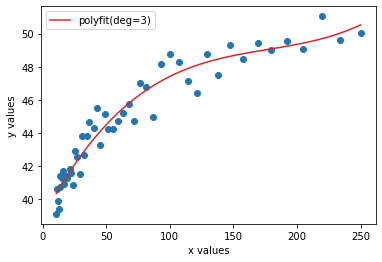

In [68]:
fit(x, y, 3, "x values", "y values", "polyfit(deg=3)")

In [8]:
import numpy as np

# define coefficients
coefs = np.polyfit(x, y, deg=3)
print("Coefficients:", coefs)

Coefficients: [ 1.43228579e-06 -7.60443909e-04  1.47246964e-01  3.88611039e+01]


- Compute the RSS and R2 measures

In [9]:
# Compute predictions for each data point
y_pred = np.polyval(coefs, x)

# R2 coefficient when separating sources
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))

print("RSS value:", RSS(y, y_pred))

RSS value: 33.2218296471217


In [10]:
import numpy as np

# Define RSS measure
def RSS(y, y_pred):
    return np.sum(np.square(np.subtract(y, y_pred)))


# RSS of the baseline
rss_baseline = RSS(y, y.mean())
print("RSS baseline:", rss_baseline)

RSS baseline: 541.1432872199999


Now that we have a baseline, we can fit other models and compare them against this baseline score.

In [11]:
from scipy.linalg import lstsq

# Fit a multiple linear regression
X1 = np.c_[np.ones(x.shape[0]), x]
w, model_rss, _, _ = lstsq(X1, y)
print("RSS:", model_rss)  # ~1.685

RSS: 94.16623549419026


- Discuss the results, is it a good R2 score.


In [12]:
# R^2 coefficient
R2 = 1 - (model_rss / rss_baseline)
print("R^2 coefficient:", R2)  # Prints: ~0.82

R^2 coefficient: 0.8259865035415153


The R2 coefficient is around 82% which is quite close to 100%, meaning that the RSS model performs better than baseline

## Task 2
The second task consists of fitting a model to a set of data points that contains outliers.
Here are the first five entries

In [19]:
# Load data
data_df = pd.read_csv("p3_task-2.csv")
data_df.shape

(1000, 4)

In [20]:
data_df.head()

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


The goal is to try and compare different approaches to handle outliers. Use the train/test split methodology (ex. 80-20 splits) and compare the test MAE score for each one of the following approaches

- Fit a linear regression with the outliers
- Fit a huber regression with the outliers
- Fit a linear regression without the outliers

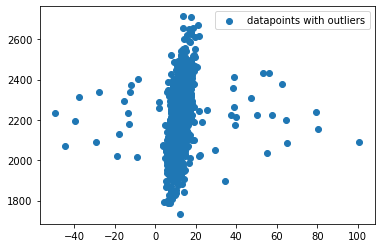

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Create x/y Numpy arrays
x = data_df.x1.values
y = data_df.y.values

# Plot the data points
plt.scatter(x, y, label="datapoints with outliers")
plt.legend()
plt.show()

As per above plot, it looks like there are some outliers on the both sides of x-axis and on the upper zone of y-axis. So, I'd first try to manually remove them and see how the regression would look like

In [22]:
# Select outliers manually
idx = (x < 2.5) | (x > 21) | (y > 2600) | (y < 1800) 

In [23]:
# Extract "normal" points
x1, y1 = x[~idx], y[~idx]
print("x1/y1:", x1.shape, y1.shape)

# Extract outliers
x2, y2 = x[idx], y[idx]
print("x2/y2:", x2.shape, y2.shape)

x1/y1: (943,) (943,)
x2/y2: (57,) (57,)


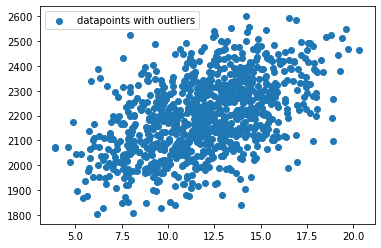

In [24]:
# Plot the data points
plt.scatter(x1, y1, label="datapoints with outliers")
plt.legend()
plt.show()

## Fit a linear regression with and without outliers

In [25]:
import numpy as np

# Fit a linear regression with outliers
coefs = np.polyfit(x, y, deg=1)
print("coefs:", coefs)

coefs: [   3.39164317 2162.45859644]


In [26]:
# Fit a linear regression without outliers
coefs_wo = np.polyfit(x1, y1, deg=1)
print("coefs without outliers:", coefs_wo)

coefs without outliers: [  24.48425223 1908.02669441]


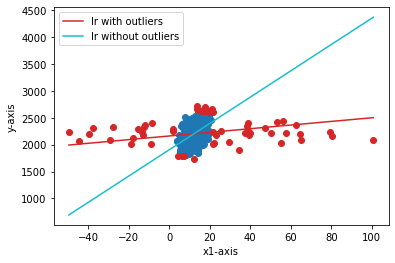

In [27]:
# Compute prediction line
x_values = np.linspace(min(x), max(x), num=100)
y_values = np.polyval(coefs, x_values)
y_values_wo = np.polyval(coefs_wo, x_values)


# Plot them
plt.scatter(x1, y1)
plt.scatter(x2, y2, c="C3")
plt.plot(x_values, y_values, c="C3", label="lr with outliers")
plt.plot(x_values, y_values_wo,c="C9", label="lr without outliers")
plt.xlabel("x1-axis")
plt.ylabel("y-axis")
plt.legend()
plt.show()

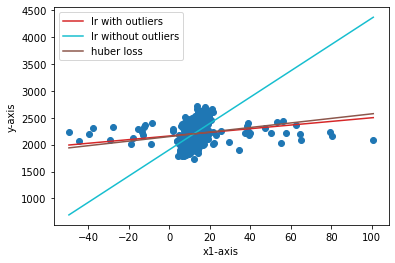

In [28]:
from sklearn.linear_model import HuberRegressor

# Create object
lr_huber = HuberRegressor(epsilon=1.1)

# Fit it
lr_huber.fit(x[:, np.newaxis], y)

# Compute predictions
y_values_huber = lr_huber.predict(x_values[:, np.newaxis])

# Plot the prediction line
plt.scatter(x, y)
plt.plot(x_values, y_values, c="C3", label="lr with outliers")
plt.plot(x_values, y_values_wo,c="C9", label="lr without outliers")
plt.plot(x_values, y_values_huber, c="C5", label="huber loss")
plt.xlabel("x1-axis")
plt.ylabel("y-axis")
plt.legend()
plt.show()

Huber loss function seem to be close to regression with outliers, which is not expected. Therefore, the above approach is not correct.

Now I'd try to split the data on test and train sets, and filter out outliers using z-score method, and further compare differnt regressions.

In [29]:
#import train_test_split library from sklearn
from sklearn.model_selection import train_test_split

x_tr, x_te,y_tr,y_te = train_test_split(x,y,test_size =0.2)

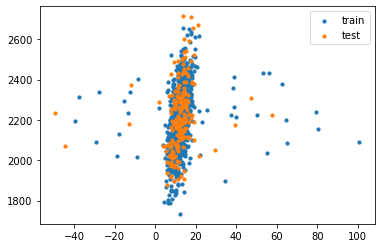

In [30]:
# Plot data points
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x_tr, y_tr, label="train", s=10)
plt.scatter(x_te, y_te, label="test", s=10)
plt.legend()
plt.show()

In [31]:
# Define the MAE cost function
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

MAE linear regression: 128.755
MAE polyfit(deg=3): 128.022
MAE Huber: 129.710


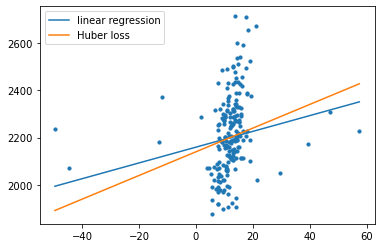

In [32]:
import numpy as np

# (A) Test different models
# * Linear regression
coefs_lr = np.polyfit(x_tr, y_tr, deg=1)  # Fit to train data
y_pred_lr = np.polyval(coefs_lr, x_te)  # Predictions for test data points
mae_lr = MAE(y_te, y_pred_lr)  # MAE of predictions
# Print performance on test set
print("MAE linear regression: {:.3f}".format(mae_lr))

# * Polyfit with degree 3
coefs_poly3 = np.polyfit(x_tr, y_tr, deg=3)  # Fit to train data
y_pred_poly3 = np.polyval(coefs_poly3, x_te)  # Predictions for test data points
mae_poly3 = MAE(y_te, y_pred_poly3)  # MAE of predictions
print("MAE polyfit(deg=3): {:.3f}".format(mae_poly3))


# * Huber loss
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor(epsilon=1.1)  # Create object
huber.fit(x_tr[:, np.newaxis], y_tr)  # Fit it to train data
y_pred_huber = huber.predict(x_te[:, np.newaxis])  # Predictions for test data points
mae_huber = MAE(y_te, y_pred_huber)  # MAE of predictions
print("MAE Huber: {:.3f}".format(mae_huber))

# Plot the prediction curves
# Generate a hundred points
x_values = np.linspace(min(x_te), max(x_te), num=100)

# and the predictions
y_values_lr = np.polyval(coefs_lr, x_values)
y_values_poly3 = np.polyval(coefs_poly3, x_values)
y_values_huber = huber.predict(x_values[:, np.newaxis])

# Plot them
plt.scatter(x_te, y_te, s=10)
plt.plot(x_values, y_values_lr, label="linear regression")
#plt.plot(x_values, y_values_poly3, label="polyfit(deg=3)")
plt.plot(x_values, y_values_huber, label="Huber loss")
plt.legend()
plt.show()

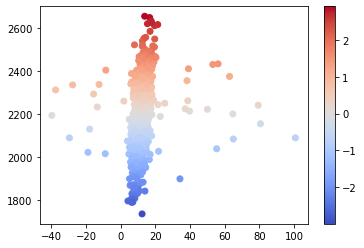

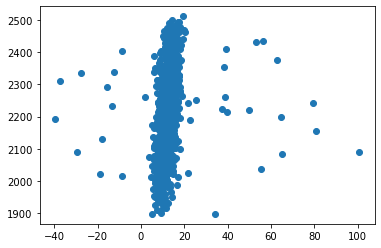

In [33]:
# (B) Remove outliers
# Compute z-scores
z_scores = (y_tr - np.mean(y_tr)) / np.std(y_tr)

# Plot them
plt.scatter(x_tr, y_tr, c=z_scores, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()

# Detect "extreme" data points
# 2 standard deviations away form the mean
idx = np.abs(z_scores) < 2

# Remove them
x_tr2, y_tr2 = x_tr[idx], y_tr[idx]

# Plot the remaining points
plt.scatter(x_tr2, y_tr2)
plt.show()

MAE linear regression 2: 128.519
MAE polyfit(deg=3) 2: 127.870


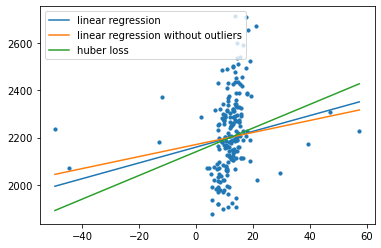

In [38]:
# Linear regression without outliers
coefs_lr2 = np.polyfit(x_tr2, y_tr2, deg=1)  # Fit to train data without outliers
y_pred_lr2 = np.polyval(coefs_lr2, x_te)  # Predictions for test data points
mae_lr2 = MAE(y_te, y_pred_lr2)  # MAE of predictions
print("MAE linear regression 2: {:.3f}".format(mae_lr2))

# Polyfit with degree 3
coefs_poly3_2 = np.polyfit(x_tr2, y_tr2, deg=3)  # Fit to train data without outliers
y_pred_poly3_2 = np.polyval(coefs_poly3_2, x_te)  # Predictions for test data points
mae_poly3_2 = MAE(y_te, y_pred_poly3_2)  # MAE of predictions
print("MAE polyfit(deg=3) 2: {:.3f}".format(mae_poly3_2))

# Predictions for the hundred x_values
y_values_lr2 = np.polyval(coefs_lr2, x_values)
y_values_poly3_2 = np.polyval(coefs_poly3_2, x_values)

# Plot all models
plt.scatter(x_te, y_te, s=10)
plt.plot(x_values, y_values_lr, label="linear regression")
plt.plot(x_values, y_values_lr2, label="linear regression without outliers")
plt.plot(x_values, y_values_huber, label="huber loss")
#plt.plot(x_values, y_values_poly3, label="polyfit(deg=3)")
#plt.plot(x_values, y_values_poly3_2, label="polyfit(deg=3) without outliers")
plt.legend()
plt.show()

After splitting the data into train and test sets, and removing outliers with z-sore method the regression without outliers got closer to Huber function.

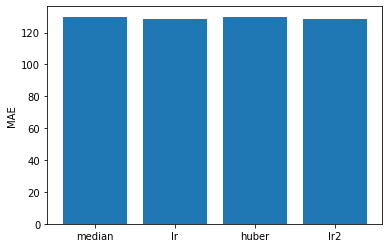

In [37]:
# (C) Final comparison
# Baseline
mae_baseline = MAE(y_te, np.median(y_tr))

# Bar plot
mae_values = [mae_baseline, mae_lr, mae_huber, mae_lr2]
titles = ["median", "lr", "huber", "lr2"]

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)

plt.ylabel("MAE")
plt.show()

The above visualization shows that each model performs on the similar level and close values for Mean Squared Values